# Method 1: using pillow library

In [1]:
#checking is gpu is installed properly
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"GPUs detected: {physical_devices}")

    for gpu in physical_devices:
        gpu_details = tf.config.experimental.get_device_details(gpu)
        print(f"GPU: {gpu}, Name: {gpu_details['device_name']}")
else:
    print("No GPUs detected")

GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), Name: NVIDIA GeForce RTX 2050


In [2]:
from rembg import remove 
from PIL import Image 
from IPython.display import display, Image
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

image_path =  "C:\\Users\\vskav\\Downloads\\eagle.jpg" 
input = Image.open(image_path)

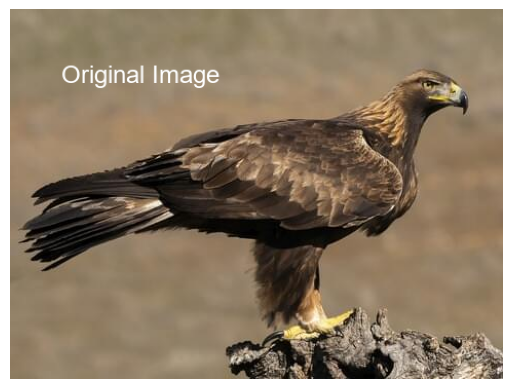

In [3]:
#Annotating in image
draw = ImageDraw.Draw(input)

annotation = "Original Image"
font = ImageFont.truetype("arial.ttf", 24)

position = (50, 50)

draw.text(position, annotation, fill="white", font=font)

plt.imshow(input)
plt.axis('off')
plt.show()

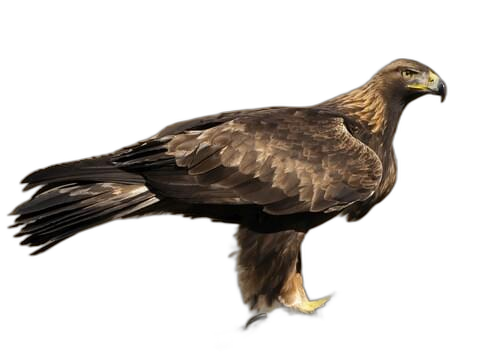

In [5]:
output_image = remove(input)
display(output_image)

# Method 2: using Background Remover

In [6]:
#pip install backgroundremover

In [7]:
from backgroundremover.bg import remove
from PIL import Image as PILImage
from IPython.display import display, Image
import io
import tempfile

In [8]:
input_image_path = "C:\\Users\\vskav\\Downloads\\eagle.jpg"  # Change this to your input image path

with PILImage.open(input_image_path) as img:
    # Convert image to bytes
    img_byte_array = io.BytesIO()
    img.save(img_byte_array, format='PNG')
    img_bytes = img_byte_array.getvalue()

# Remove background
processed_img = remove(img_bytes, model_name="u2net",
                       alpha_matting=True,
                       alpha_matting_foreground_threshold=240,
                       alpha_matting_background_threshold=10,
                       alpha_matting_erode_structure_size=10,
                       alpha_matting_base_size=1000)

DEBUG: path to be checked: C:\Users\vskav\.u2net\u2net.pth


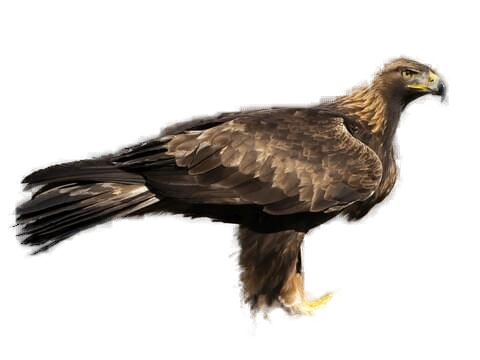

In [9]:
processed_image = PILImage.open(io.BytesIO(processed_img))
display(processed_image)

# Method 3: using Background remover

In [10]:
#!pip install transparent-background

In [11]:
from PIL import Image
from transparent_background import Remover
from IPython.display import display

In [12]:
remover = Remover()
img = Image.open("C:\\Users\\vskav\\Downloads\\eagle.jpg").convert('RGB')
out = remover.process(img)

  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



Settings -> Mode=base, Device=cpu, Torchscript=disabled


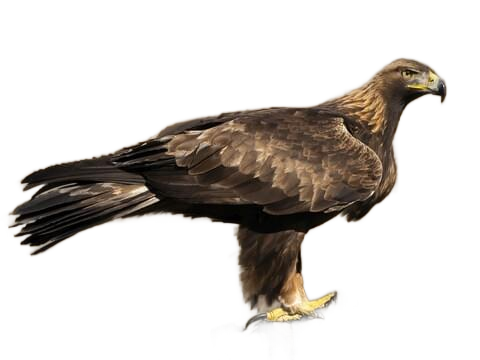

In [13]:
# Display the output image in Jupyter Notebook
display(out)

# Method 4: using Carvekit

In [14]:
#!pip install carvekit

In [15]:
import PIL.Image
from IPython.display import display
from carvekit.api.interface import Interface
from carvekit.ml.wrap.fba_matting import FBAMatting
from carvekit.ml.wrap.tracer_b7 import TracerUniversalB7
from carvekit.pipelines.postprocessing import MattingMethod
from carvekit.pipelines.preprocessing import PreprocessingStub
from carvekit.trimap.generator import TrimapGenerator

In [16]:
seg_net = TracerUniversalB7(device='cpu', batch_size=1)
fba = FBAMatting(device='cpu', input_tensor_size=2048, batch_size=1)
trimap = TrimapGenerator()
preprocessing = PreprocessingStub()
postprocessing = MattingMethod(matting_module=fba, trimap_generator=trimap, device='cpu')

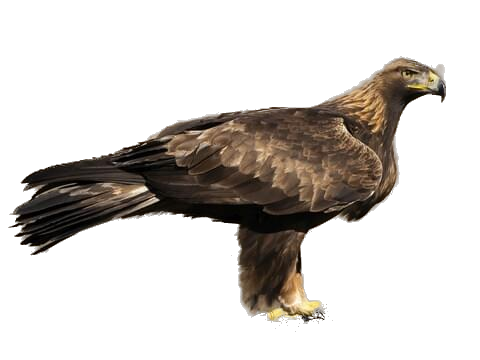

In [18]:
interface = Interface(pre_pipe=preprocessing, post_pipe=postprocessing, seg_pipe=seg_net)
image = PIL.Image.open('C:\\Users\\vskav\\Downloads\\eagle.jpg')
result = interface([image])[0]
display(result)